In [4]:
import ResultsInspectors.ga_inspector as gai
import ResultsInspectors.bo_inspector as boi
import matplotlib.pyplot as plt


accuracies = {'ga': [], 'ga_ros': [], 'bo': [], 'bo_ros': []}

61.17076754801031


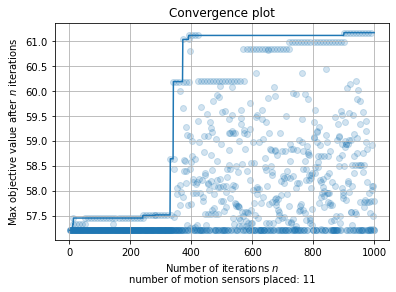

61.166357419057476


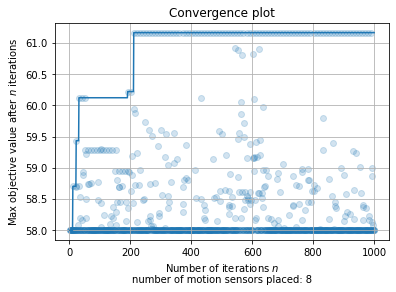

54.252014315576155


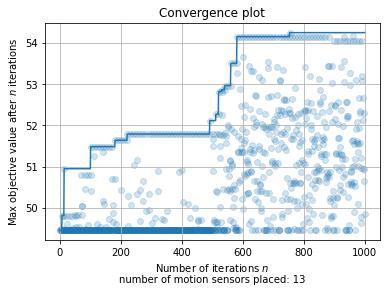

58.80070273518317


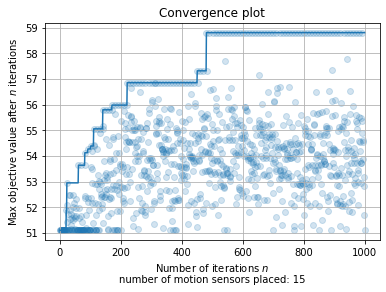

63.5421408345152


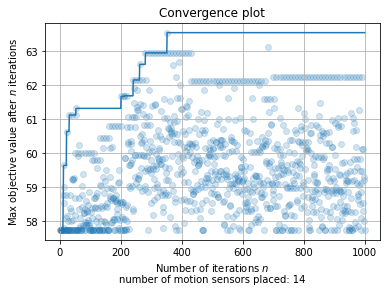

In [2]:


results = gai.read_files('Results/GA_ROS/')

for run in results:
    acc = []
    sensor_num = []
    for generation in run:
        for chromosome in generation:
            acc.append(chromosome[0])
            sensor_num.append(chromosome[1])
            
    accuracies['ga_ros'].append(max(acc))
    print(max(acc))
    gai.plot_convergence(acc, xlabel="Number of iterations $n$\n" + 'number of motion sensors placed: ' + str(int(sensor_num[acc.index(max(acc))])),)
    plt.show()

In [13]:
(11 + 8 + 13 + 15 + 14) / 5

12.2

55.61855467845326


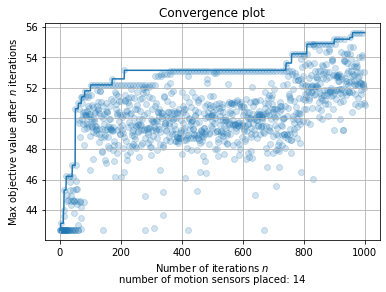

57.45835712062098


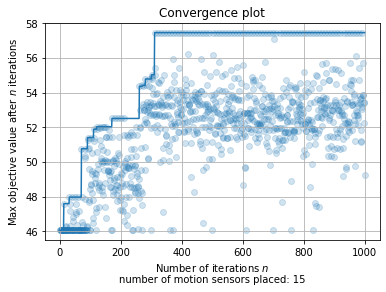

55.30530068562381


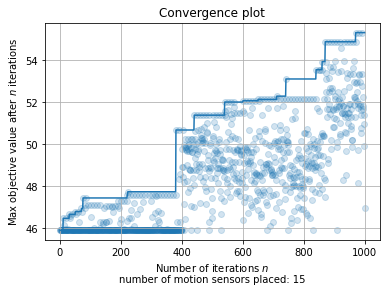

54.65274378038265


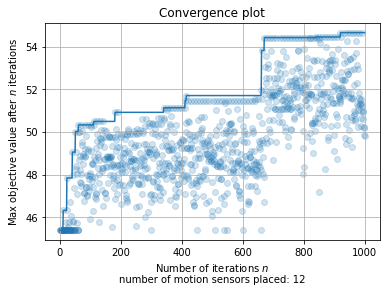

56.503320032738834


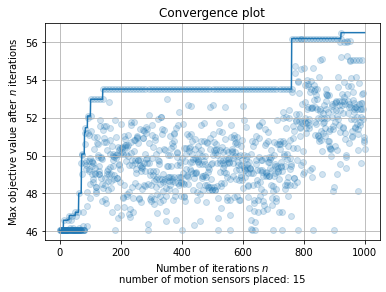

In [3]:
import matplotlib.pyplot as plt

results = gai.read_files('Results/GA/')

for run in results:
    acc = []
    sensor_num = []
    for generation in run:
        for chromosome in generation:
            acc.append(chromosome[0])
            sensor_num.append(chromosome[1])
            
    accuracies['ga'].append(max(acc))
    print(max(acc))
    gai.plot_convergence(acc, xlabel="Number of iterations $n$\n" + 'number of motion sensors placed: ' + str(int(sensor_num[acc.index(max(acc))])),)
    plt.show()

69.61479341032657


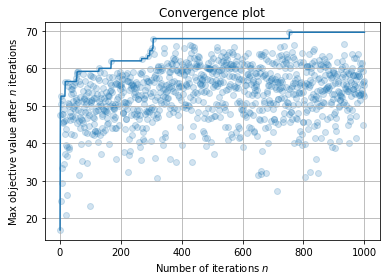

In [81]:
results = boi.read_files('Results/BO/')
accuracies_bo = []


for result in results:
    data = [100 - p for p in result.perfs]
    boi.plot_convergence(data)
    accuracies['bo'].append(max(data))
    print(max(data))
    plt.show()

In [88]:
len(result.get_all_configs())

1000

In [89]:
maxs

[16.900033249154717,
 47.434538279879476,
 50.41016683469029,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 52.5726662998421,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843564906,
 56.46253843

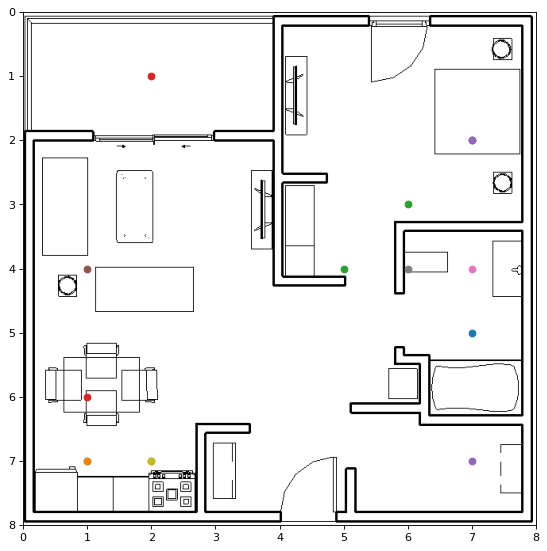

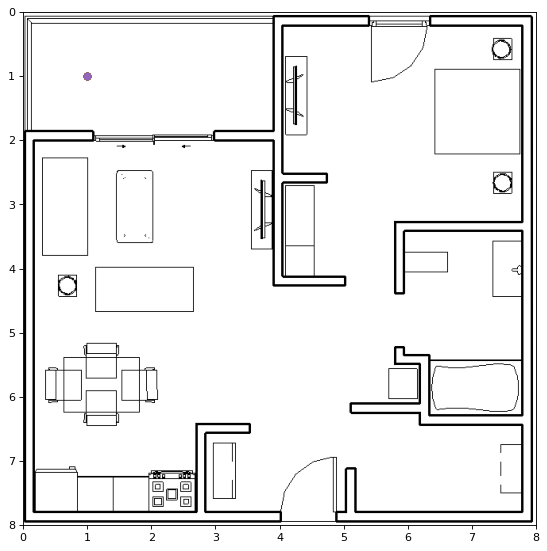

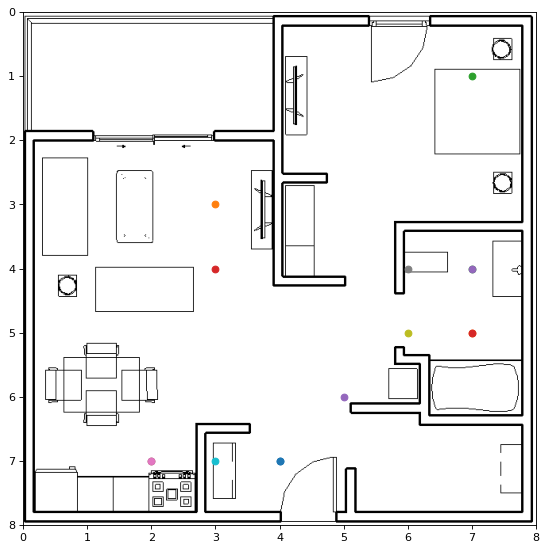

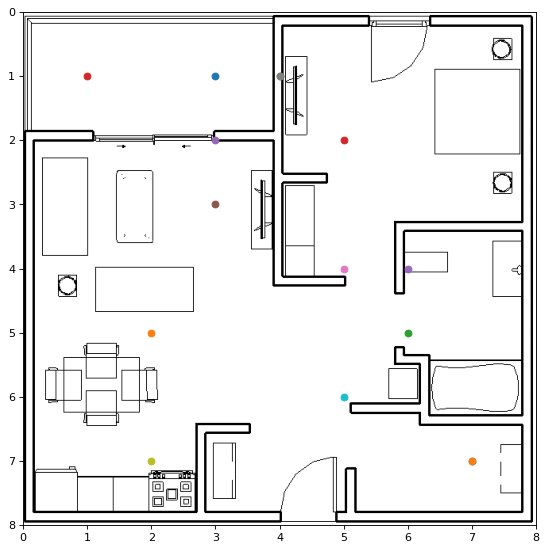

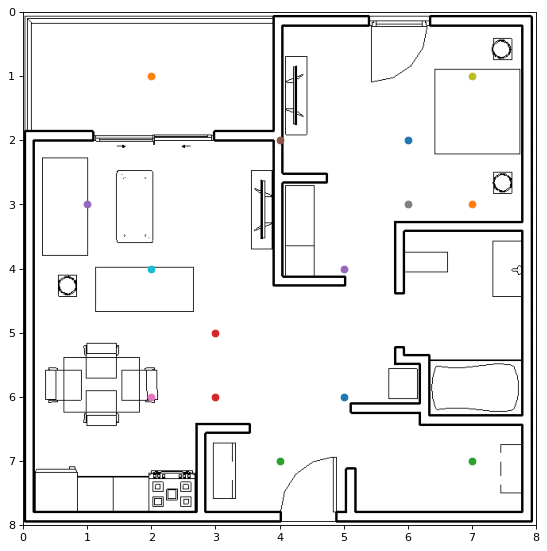

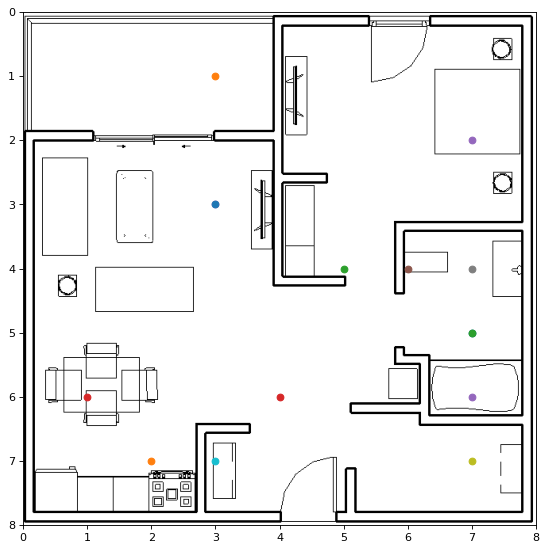

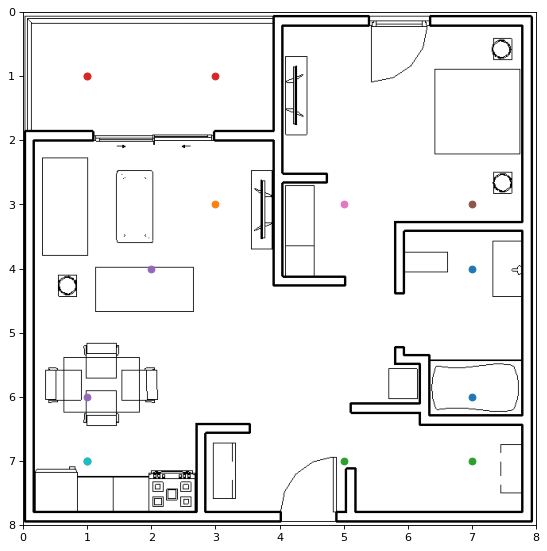

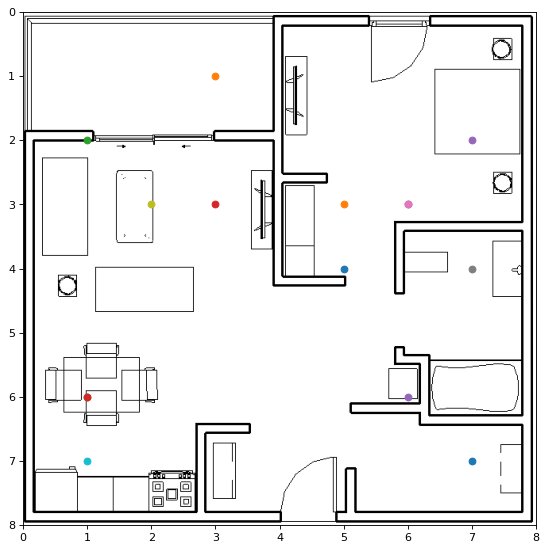

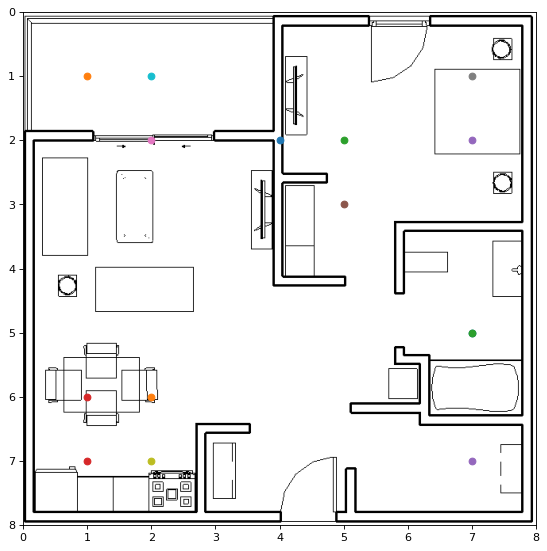

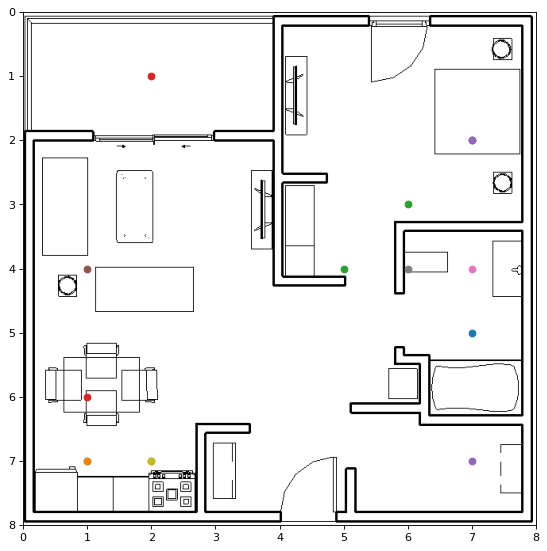

In [96]:
from IPython import display
import pylab as pl
import numpy as np

def get_sensor_locations(c):
    coordinates = c.get_dictionary()

    Xs = []
    Ys = []
    for key in coordinates.keys():

        if 'x' in key:
            # print(coordinates[key])
            Xs.append(coordinates[key])
        else:
            Ys.append(coordinates[key])

    return Xs, Ys


results = boi.read_files('Results/BO_ROS/')
accuracies_bo = []

for result in results:
    
    data = [100 - p for p in result.perfs]
    losses = list(data)

    n_calls = len(losses)
    maxs = [np.max(losses[:i]) for i in range(1, n_calls + 1)]
    change = []
    last = 0
    
    for i in range(len(maxs)):
        if (maxs[i] != last):
            last = maxs[i]
            change.append(i)
    
    data = [100 - p for p in result.perfs]
    boi.plot_convergence(data)
    accuracies['bo_ros'].append(max(data))
    print(max(data))
    # plt.show()
    
    configs = result.get_all_configs()
    
    for config_index in change:
        c = configs[config_index]
    
    
        Xs, Ys = get_sensor_locations(c)

        fig, ax = plt.subplots(figsize=(8.5, 8.5), dpi=80)
        for i in range(len(Xs)):
            
            

            

            xlim=(0, 8.0)
            ylim=(0, 8.0)
            
            plt.scatter(Xs[i], Ys[i])
            # ax.plot(Xs[i], Ys[i], marker='o', color='k', lw=10)
            
            plt.xlim(*xlim)
            plt.ylim(*ylim)
            
            # plt.show()
            fig.canvas.draw()

            
            
            
            img = plt.imread("testcase.jpg")
            im = plt.imshow(np.flipud(img), origin='upper', extent=[0, 8, 0, 8])
            # ax.imshow(img, extent=[0, 8, 0, 8])
            
            plt.gca().invert_yaxis()
            
        display.clear_output(wait=True)
        display.display(pl.gcf())
            
        # plt.show()
    
    break

In [45]:
Xs

[7, 3, 4, 1, 7, 1, 7, 6, 3, 1, 7, 1, 5, 2, 1]

In [46]:
Ys

[5, 7, 1, 5, 7, 3, 4, 3, 6, 5, 2, 7, 3, 1, 1]

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind_from_stats
from statistics import mean
from statistics import stdev
import ast
from collections import defaultdict

statistic = pd.DataFrame()
pvalue = pd.DataFrame()

def compare(data, minVal, maxVal = None): 
  data_compare = pd.DataFrame()

  for i1, v1 in pvalue.items():
    for i2, v2 in pvalue.items():
      if maxVal == None:
        if data.loc[i1,i2] < minVal:
          data_compare.loc[i1,i2] = True
        else:
          data_compare.loc[i1,i2] = False

      if maxVal != None:
        if data.loc[i1,i2] < minVal or data.loc[i1,i2] > maxVal:
          data_compare.loc[i1,i2] = True
        else:
          data_compare.loc[i1,i2] = False
  return data_compare


mean_std = pd.DataFrame()
for key1 in accuracies:
    for key2 in accuracies:
        
        # print(np.std(accuracies[key1]))
        # print(np.mean(accuracies[key1]))
        
        mean_std.loc[key1, 'Mean'] = np.mean(accuracies[key1])
        mean_std.loc[key1, 'STD'] = np.std(accuracies[key1])
                                             
        
        t = ttest_ind_from_stats(mean1=np.mean(accuracies[key1]), std1=np.std(accuracies[key1]), nobs1=5,
                                 mean2=np.mean(accuracies[key2]), std2=np.std(accuracies[key2]), nobs2=5)
        
        statistic.loc[key1,key2] = t.statistic
        pvalue.loc[key1,key2] = t.pvalue
        

In [7]:
statistic

,ga,ga_ros,bo,bo_ros
ga,0.000000,-2.631653,-18.158360,-30.512304
ga_ros,2.631653,0.000000,-5.712657,-9.652206
bo,18.158360,5.712657,0.000000,-8.354115
bo_ros,30.512304,9.652206,8.354115,0.000000


In [8]:
pvalue

,ga,ga_ros,bo,bo_ros
ga,1.000000e+00,0.030101,8.691942e-08,1.445572e-09
ga_ros,3.010084e-02,1.000000,4.478020e-04,1.104886e-05
bo,8.691942e-08,0.000448,1.000000e+00,3.192948e-05
bo_ros,1.445572e-09,0.000011,3.192948e-05,1.000000e+00


In [9]:
compare_pvalue = compare(pvalue, 0.05)

compare_pvalue

,ga,ga_ros,bo,bo_ros
ga,False,True,True,True
ga_ros,True,False,True,True
bo,True,True,False,True
bo_ros,True,True,True,False


In [10]:
mean_std
   

,Mean,STD
ga,55.907655,0.977825
ga_ros,59.786397,3.147296
bo,68.377125,1.183930
bo_ros,73.898144,0.884355


asd
